In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

read image

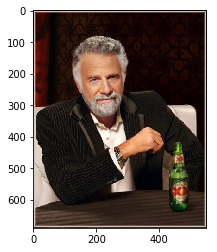

In [2]:
img=mpimg.imread('im.jpg')
imgplot = plt.imshow(img)
plt.show()

reshape image to 2D

In [3]:
H, W, Z = img.shape
img = img.reshape(H*W,Z)
print (img.shape)

(379500, 3)


In [4]:
def EM(X,K,tol=1e-2,iterations=300):
    """inputs :
      X: N x D input data vector 
      K: number of clusters
      tol: tolerance
      iterations: max number of loops
    outputs :
      M: K x D mean vector
      S: K x D covariance vector
      P: K mixing vector
      """
    #initialize parameters
    N,D =X.shape
    M = (np.array( [np.mean(X, axis=0),]*K ) + np.random.randn( K, D ))
    S = (np.array( [np.std(X),]*K ) + np.random.randn( K ))
    P = np.array([1/K for i in range(K)])

    
    Jold = np.inf
    costs = []
    
    for i in range(iterations):
        
        J=0
        
        #E - step
        resp=np.zeros((K,N))

        for k in range(K):
            
            prod=np.log(1.0/np.sqrt(2.0*math.pi*S[k]))-1.0*(np.square(X-M[k]))/(2.0*S[k])
            prod=np.sum(prod,axis=1)
            resp[k] = np.log(P[k])+prod

        m=np.max(resp,axis=0)
        resp = np.exp(resp-m)
        resp = resp/np.sum(resp,axis=0)
        resp=resp.T
        
        #M - step
        for k in range (K):
            
            num=0.000001+np.sum(resp[:,k,np.newaxis]*X,axis=0)
            den=np.sum(resp[:,k,np.newaxis],axis=0)
            M[k]=num/den

            num=np.sum(resp[:,k,np.newaxis]*np.square(X-M[k]),axis=0)
            num=np.sum(num)
            den=np.sum(resp[:,k])
            den=D*den
            S[k]=num/den

            num=np.sum(resp[:,k])
            den=resp.shape[0]
            P[k]=num/den

        #loss calculation
        loss = np.zeros((K,N))
        
        for k in range(K):
            prod=np.log(1.0/np.sqrt(2.0*math.pi*S[k]))-1.0*(np.square(X-M[k]))/(2.0*S[k])
            prod=np.sum(prod,axis=1)
            loss[k]= np.log(P[k])+prod
        
        m=np.max(loss,axis=0)
        loss = np.exp(loss-m)
        loss=np.sum(loss,axis=0)
        loss=loss.T
        loss=m + np.log(loss)
        loss=np.sum(loss)

        J=loss
        costs.append(J)

        if np.abs(J - Jold) < tol:
            break
        Jold = J
        
    return P,M,S

In [5]:
def segment(X,P,M,S,H,W):
    """inputs :
      X: N x D input data vector 
      M: K x D mean vector
      S: K x D covariance vector
      P: K mixing vector
      H: image height
      W: image width
      """     
    N,D = X.shape
    K=P.shape[0]
    segment=np.zeros((N,D))
    error = 0
    
    #reconstruct image 
    for index in range(N):
        
        likelihoods = np.zeros(K)
        
        for k in range(K):
            
            prod=(1.0/np.sqrt(2.0*math.pi*S[k]))*np.exp(-1.0*(np.square(X[index]-M[k]))/(2.0*S[k]))
            prod=np.prod(prod)
            likelihoods[k]=P[k]*prod
            
        max_likelihood = np.argmax(likelihoods)
        segment[index] = M[max_likelihood]
        
        #calculate reconstruction error
        error =error + np.square(np.linalg.norm(X[index]-segment[index]))

    im = segment.reshape(H,W,3)
    im=im.astype(np.uint8)
    imgplot = plt.imshow(im)
    plt.show()

    print("Total reconstruction error : "+ str(error/N))
        

K=1


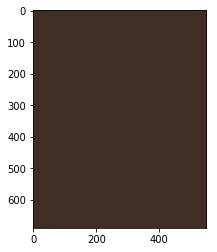

Total reconstruction error : 11362.394937269142

***************************************

K=2


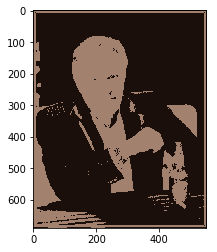

Total reconstruction error : 3175.0157748554543

***************************************

K=4


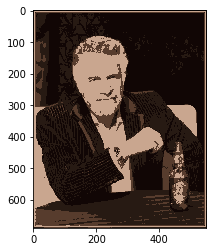

Total reconstruction error : 1092.5033113026655

***************************************

K=8


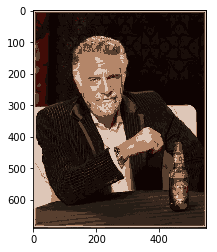

Total reconstruction error : 508.95162679557444

***************************************

K=16


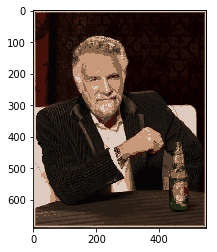

Total reconstruction error : 348.0160358971108

***************************************

K=32


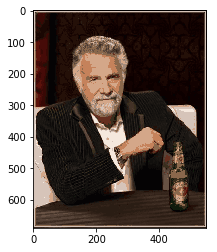

Total reconstruction error : 183.13809607028

***************************************

K=64


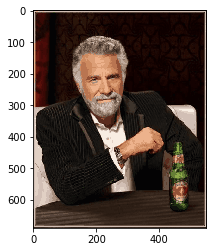

Total reconstruction error : 78.48460256064892

***************************************



In [6]:
Cluster = [1,2,4,8,16,32,64]

for k in range(len(Cluster)):
    
    print("K="+str(Cluster[k]))
    
    P,M,S = EM(img,Cluster[k])
    
    segment(img,P,M,S,H,W)
    
    print("\n***************************************\n")